# Iris Classification

In [16]:
from sklearn import datasets

df = datasets.load_iris(as_frame=True)
X = df['data']
y = df['target']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.50,
    random_state=42,
    stratify=y # ensure balanced split
)

In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)

In [19]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [20]:
model.score(X_train, y_train)

0.96

In [21]:
model.score(X_test, y_test)

0.9466666666666667

In [34]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

report = classification_report(
    y_test,
    y_pred,
    target_names=df['target_names']
)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        25
  versicolor       0.81      1.00      0.89        25
   virginica       1.00      0.76      0.86        25

    accuracy                           0.92        75
   macro avg       0.94      0.92      0.92        75
weighted avg       0.94      0.92      0.92        75



### Search hyper parameters

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# now create a searchCV object and fit it to the data
search = RandomizedSearchCV(
    n_jobs=-1, # use all cores
    estimator=RandomForestClassifier(random_state=0),
    n_iter=5,
    param_distributions={
        'n_estimators': randint(1, 5),
        'max_depth': randint(5, 10)
    },
    random_state=0
)
search.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=0), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000206A6585250>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000206A6993B50>},
                   random_state=0)

In [51]:
print(search.best_params_)

{'max_depth': 9, 'n_estimators': 4}


In [54]:
search.score(X_test, y_test)

0.88

### Finding the best model

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Define the models
max_iter = 100
models = {
    'LR': LogisticRegression(
        multi_class='ovr',
        max_iter=max_iter,
        random_state=42,
    ),
    'DT': DecisionTreeClassifier(
        random_state=42,
        max_depth=3,
        min_samples_leaf=len(X_train) // 40,
    ),
    'KNN_3': KNeighborsClassifier(n_neighbors=3),
    'KNN_5': KNeighborsClassifier(n_neighbors=5),
}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name} Accuracy: {score:.3f}")

LR Accuracy: 0.947
DT Accuracy: 0.907
KNN_3 Accuracy: 0.920
KNN_5 Accuracy: 0.947


### Plot Confusion Matrix

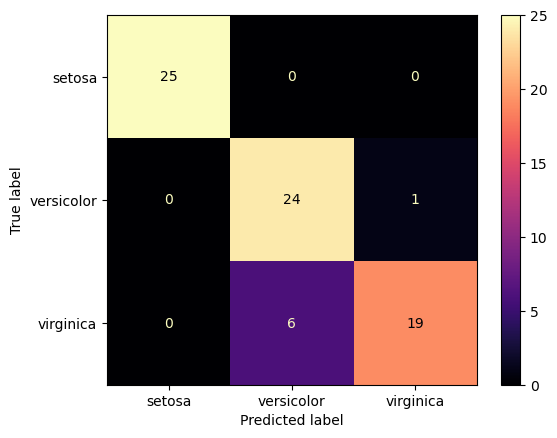

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_test,
    models['DT'].predict(X_test),
    display_labels=df['target_names'],
    cmap='magma',
)
plt.show()